# Phase 0: Imports

Loading required python packages.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr
%matplotlib inline

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor 

#metrics, procssing and model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Phase 1: Data Collection

As kaggle already provided us with data in the form of csv files, all we have to do is load them into dataframes.

In [89]:
#loading csv's
train=pd.read_csv('df - train_set.csv')
test=pd.read_csv('df - test_set.csv')
test_id=test['Index']
test=test.drop('Index',axis=1)

# Phase 2: Data Cleaning

Kaggle tries to provide us with clean data but it's always a good idea to check for ourselves. We check for null and empty values.

In [90]:
train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [91]:
i=0
for x in train.columns:
    if '' in sorted(train[x].unique()):
        i+=1
print('The data contains '+str(i)+' empty values over all columns')

The data contains 0 empty values over all columns


none of our columns contain any null or empty values.

In [92]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


The table contains information about 'Commodoties that we are not interested in, we filter only for 'APPLE GOLDEN DELICIOUS'.

In [93]:
#Filter for Golden Delicious Apples
train=train[train['Commodities']=='APPLE GOLDEN DELICIOUS']
test=test[test['Commodities']=='APPLE GOLDEN DELICIOUS']
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


We may as well remove the "Commodities" column as it has no more useful information.

In [94]:
#Remove Commodities
train=train.drop(["Commodities"],axis=1)
test=test.drop(["Commodities"],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Date              1952 non-null   object 
 5   Low_Price         1952 non-null   float64
 6   High_Price        1952 non-null   float64
 7   Sales_Total       1952 non-null   float64
 8   Total_Qty_Sold    1952 non-null   int64  
 9   Total_Kg_Sold     1952 non-null   float64
 10  Stock_On_Hand     1952 non-null   int64  
 11  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


We note that the DataFrame consists of 12 columns.(11 predictors and 1 response)

The predictor variables are broken down into the following types:

    -object: Province, Container, Size_Grade and Date

    -float: Weight_Kg, Low_Price, High_Price, Sales_Total and Total_Kg_Sold

    -integer: Total_Qty_Sold and Stock_On_Hand
    
with the response variable(avg_price_per_kg) being a float.

# Phase 3: Exploratory Data Analysis

## 3.1: Univariate Analysis

#### 3.1.1: Numeric data

In [95]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


We can see that the maximium values of our numeric data are many standard deviations(>3) away from the mean. This leads us to expect that they are outliers and will cause the distribution of the data to appear skewed.

In [96]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

We can see that all of our numeric predictors are highly skewed(skew values greater than 1). While our response variable appears symmetrical(skew value close to 0)

In [97]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

The kurtosis of our predictor values are much greater than 3. This indicates that there are strong outliers in the predictor variables.

These outliers are to be expected in data of this nature: For example:
When looking at a column like Sales_Total, many places can have sales up to a certain point but after a certain amount only the biggest places can make that much in sales. This would skew our data toward the more 'acheivable' Sales_total values and cause the larger transactions to appear as outliers.

We now convert the date column from object to datetime

In [98]:
#Date (object) --> Date (datetime)
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#### 3.1.3: Categorical Data

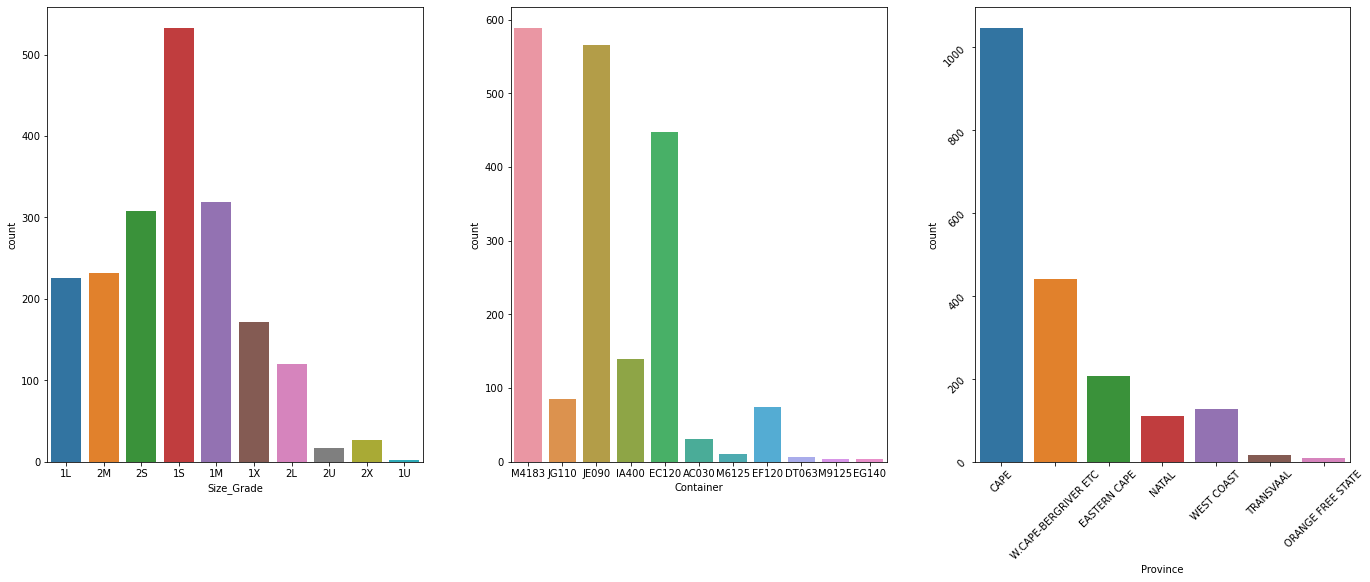

In [99]:
#Plot countplots of categorical data
fig, ax =plt.subplots(1,3, figsize=(20, 9))
sns.countplot(x=train['Size_Grade'], ax=ax[0])
sns.countplot(x=train['Container'], ax=ax[1])
sns.countplot(x="Province", data=train, ax=ax[2])
ax[2].tick_params(labelrotation=45)
fig.tight_layout(pad=4.0)

In [100]:
#count of Province as a percentage of all provinces
dict_Prov=[]
for x in sorted(train['Province'].unique()):
    dict_Prov.append([x,round(len(train[train['Province']==x])*100/len(train['Province']),2)])
dict_Prov

[['CAPE', 53.53],
 ['EASTERN CAPE', 10.55],
 ['NATAL', 5.69],
 ['ORANGE FREE STATE', 0.46],
 ['TRANSVAAL', 0.77],
 ['W.CAPE-BERGRIVER ETC', 22.54],
 ['WEST COAST', 6.45]]

In [101]:
#count of Container as a percentage of all containers
dict_Cont=[]
for x in sorted(train['Container'].unique()):
    dict_Cont.append([x,round(len(train[train['Container']==x])*100/len(train['Container']),2)])
dict_Cont

[['AC030', 1.59],
 ['DT063', 0.31],
 ['EC120', 22.95],
 ['EF120', 3.79],
 ['EG140', 0.15],
 ['IA400', 7.12],
 ['JE090', 28.94],
 ['JG110', 4.35],
 ['M4183', 30.12],
 ['M6125', 0.51],
 ['M9125', 0.15]]

In [102]:
#count of Size_Grade as a percentage of all Size_Grades
dict_Sgr=[]
for x in sorted(train['Size_Grade'].unique()):
    dict_Sgr.append([x,round(len(train[train['Size_Grade']==x])*100/len(train['Size_Grade']),2)])
dict_Sgr

[['1L', 11.53],
 ['1M', 16.34],
 ['1S', 27.25],
 ['1U', 0.1],
 ['1X', 8.76],
 ['2L', 6.15],
 ['2M', 11.89],
 ['2S', 15.78],
 ['2U', 0.87],
 ['2X', 1.33]]

## 3.2: Multivariate Analysis

#### 3.2.1: Date and avg_price_per_kg

In [103]:
#seperating date,month and year
training_day=pd.DataFrame([])
training_day['avg_price_per_kg']=train['avg_price_per_kg']
training_day['Date']=train['Date']
training_day['Day']=[x.weekday() for x in train['Date']]
training_day['Month']=[x.month for x in train['Date']]
training_day['Year-Month']=[str(x.year)+'-'+str(x.month) for x in train['Date']]
training_day['Year-Month'].unique()

array(['2020-9', '2020-4', '2020-5', '2020-3', '2019-12', '2020-8',
       '2020-7', '2020-2', '2020-6', '2020-1', '2020-10'], dtype=object)

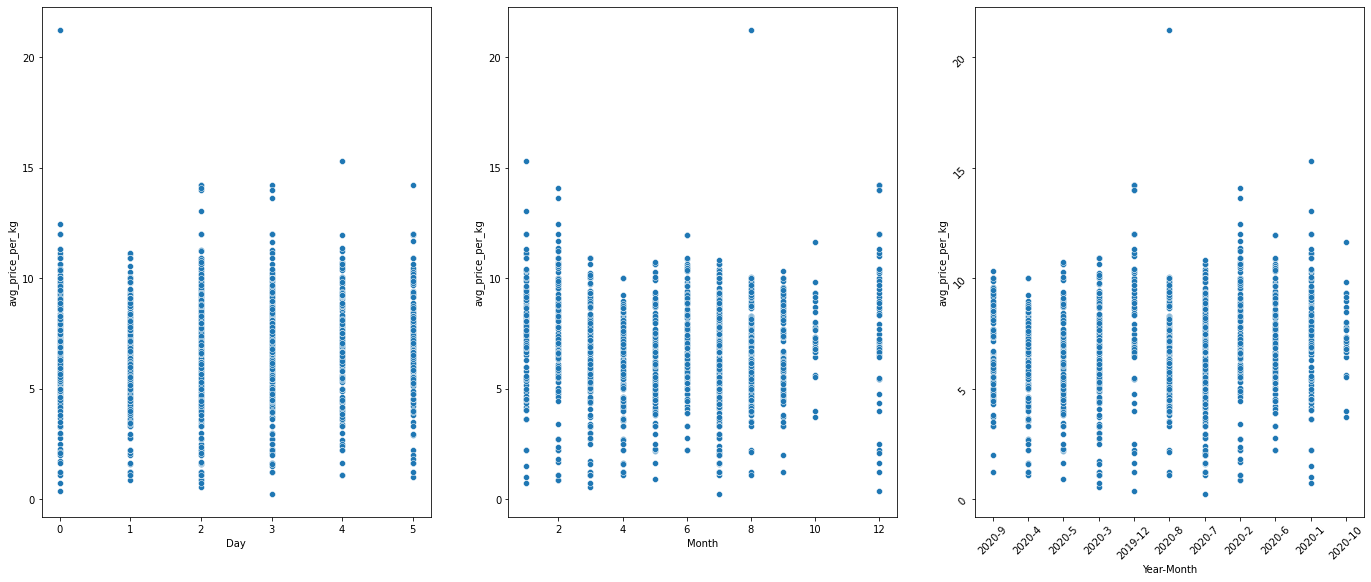

In [104]:
#Scatterplot of data_components and avg_price_per_kg
fig, ax =plt.subplots(1,3, figsize=(20, 9))
i=0
for a in training_day.drop(['Date','avg_price_per_kg'],axis=1).columns:
    sns.scatterplot(x=training_day[a],y=training_day['avg_price_per_kg'],ax=ax[i])
    i+=1
ax[2].tick_params(labelrotation=45)
fig.tight_layout(pad=4.0)

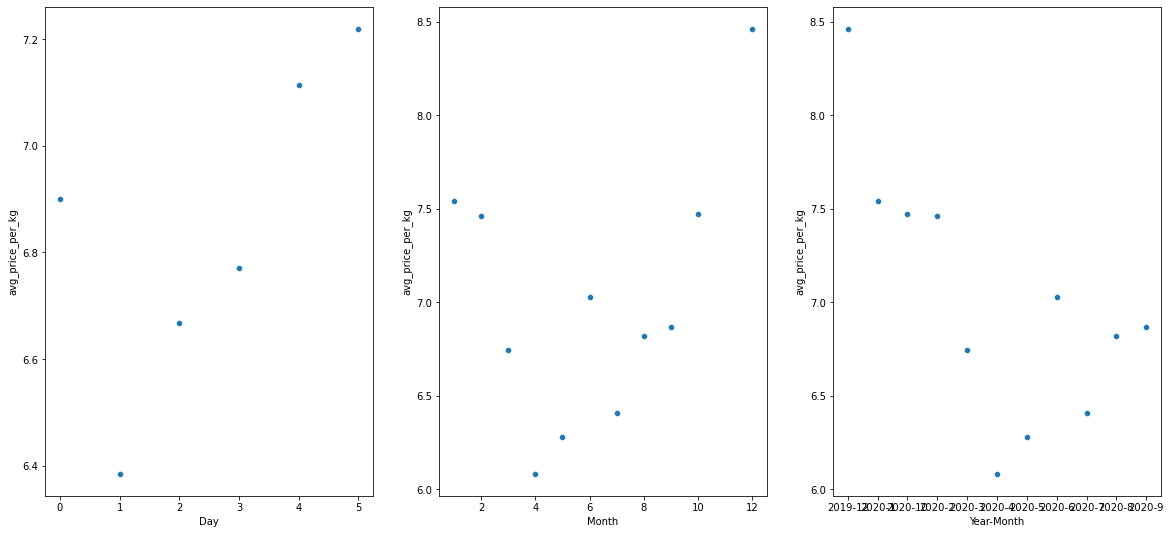

In [105]:
fig, ax =plt.subplots(1,3, figsize=(20, 9))
i=0
for a in training_day.drop(['Date','avg_price_per_kg'],axis=1).columns:
    avg_date_comp=training_day.groupby(a)['avg_price_per_kg'].mean()
    sns.scatterplot(x=avg_date_comp.index,y=avg_date_comp,ax=ax[i])
    i+=1

The relationship between the day of the week and the mean of the avg_price_per_kg is the most clear. Also,considering the data we have is not even for 1 complete year, the relationship between month and mean of avg_price_per_kg cannot be determined to any meaningful degree. Since each month only appears once and some of them are in different years.

We will use the day of the week in our modelling since it's average is taken over many months.

In [106]:
train['Day']=training_day['Day']
train=train.drop('Date',axis=1)

test['Day']=[x.weekday() for x in test['Date']]
test=test.drop('Date',axis=1)

train_dummies=train.copy()
test_dummies=test.copy()
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Low_Price         1952 non-null   float64
 5   High_Price        1952 non-null   float64
 6   Sales_Total       1952 non-null   float64
 7   Total_Qty_Sold    1952 non-null   int64  
 8   Total_Kg_Sold     1952 non-null   float64
 9   Stock_On_Hand     1952 non-null   int64  
 10  avg_price_per_kg  1952 non-null   float64
 11  Day               1952 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 262.8+ KB


#### 3.2.2 Categorical data  and avg_price_per_kg

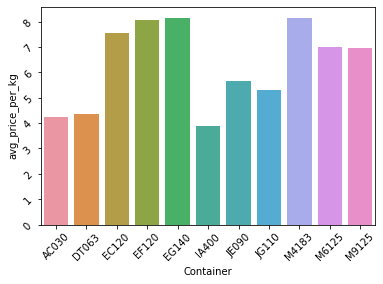

In [107]:
#Plotting the mean avg_price_per_kg against the Date
avg_container=train_dummies.groupby('Container')['avg_price_per_kg'].mean()
sns.barplot(x=avg_container.index,y=avg_container)
plt.tick_params(labelrotation=45)

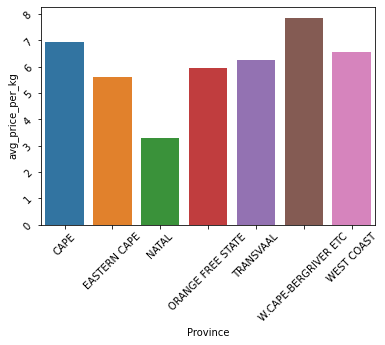

In [108]:
avg_prov=train_dummies.groupby('Province')['avg_price_per_kg'].mean()
sns.barplot(x=avg_prov.index,y=avg_prov)
plt.tick_params(labelrotation=45)

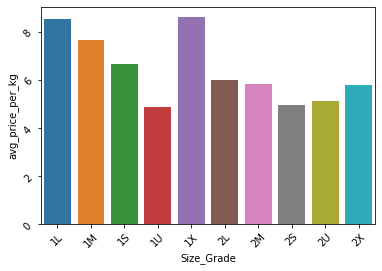

In [109]:
avg_sgr=train_dummies.groupby('Size_Grade')['avg_price_per_kg'].mean()
sns.barplot(x=avg_sgr.index,y=avg_sgr)
plt.tick_params(labelrotation=45)

As we can see, the mean of the avg_price_per_kg has some variance depending on the goup it belongs to for each of the categoical columns. Thus we should try to incorporate this data into out model. We do so by converting the categorical data into dummy variables.

In [110]:
train_dummies = pd.get_dummies(train_dummies,drop_first=True)
train_dummies.columns = [col.replace(" ","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace(".","_") for col in train_dummies.columns]
train_dummies.columns = [col.replace("-","_") for col in train_dummies.columns]
test_dummies = pd.get_dummies(test_dummies,drop_first=True)
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]
test_dummies.columns = [col.replace(".","_") for col in test_dummies.columns]
test_dummies.columns = [col.replace("-","_") for col in test_dummies.columns]

In [111]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      1952 non-null   float64
 1   Low_Price                      1952 non-null   float64
 2   High_Price                     1952 non-null   float64
 3   Sales_Total                    1952 non-null   float64
 4   Total_Qty_Sold                 1952 non-null   int64  
 5   Total_Kg_Sold                  1952 non-null   float64
 6   Stock_On_Hand                  1952 non-null   int64  
 7   avg_price_per_kg               1952 non-null   float64
 8   Day                            1952 non-null   int64  
 9   Province_EASTERN_CAPE          1952 non-null   uint8  
 10  Province_NATAL                 1952 non-null   uint8  
 11  Province_ORANGE_FREE_STATE     1952 non-null   uint8  
 12  Province_TRANSVAAL             1952 non-null   

All of our data is are now numeric.

#### 3.2.3: Numerical values and avg_price_per_kg

To perfrom linear regression we make the assumption that there is an underlying linear formula to the data we are modelling. So to optimize our model we select features so that they have a correlation with our data. While at the same time, a feature with too little variance means that the feature has little impact on our response variable and can be removed.

In the following section we will take alot look at the importance of each variable one the response by looking at it's correlation with the response variable as well as it's p-value.

We will also make sure we try and avoid multicollinearity.

Finally we will select features based on a variance threshold.

In [112]:
#Corellation and P-Values against avg_price_per_kg
corrs = train_dummies.corr()['avg_price_per_kg'].sort_values(ascending=False)
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(train_dummies[col], train_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
train_cp = pd.DataFrame(dict_cp).T
train_cp_sorted = train_cp.sort_values('P_Value')
train_cp_sorted[train_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN_CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


In [113]:
# The dependent variable remains the same:
y_data = train_dummies['avg_price_per_kg']  
 
#Choosing features based on P-Values
X_names = list(train_cp[train_cp['P_Value'] < 0.1].index)
X_data = train_dummies[X_names]

X_data_test=test_dummies[X_names]

In [114]:
# correlation matrix and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) >0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


The columns 'Container_IA400','Low_Price','High_Price' and 'Weight_Kg' are highly correlated. We drop all except for 'Weight_Kg'

In [115]:
X_data = X_data.drop(['Container_IA400','Low_Price','High_Price'],axis=1)
X_data_test=X_data_test.drop(['Container_IA400','Low_Price','High_Price'],axis=1)

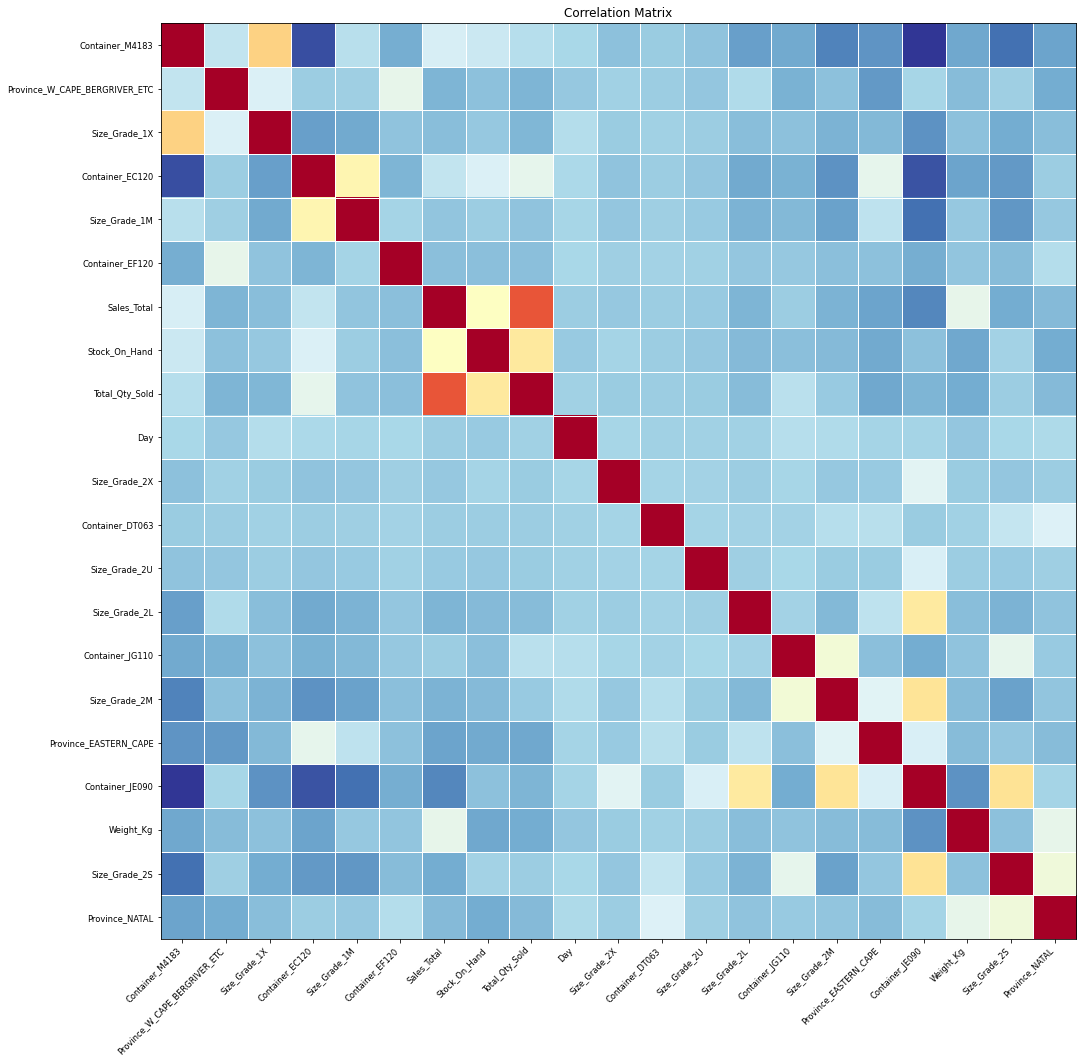

In [116]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(X_data.corr(), xnames = X_data.corr().columns, ax = ax);

It seems like most of the colinearity has been taken care of.

Next we filter by variance threshold

Variance is dependant on scale, so we nomalize our data

In [117]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [118]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [119]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
0,Container_M4183,0.210490
17,Container_JE090,0.205667
3,Container_EC120,0.176834
1,Province_W_CAPE_BERGRIVER_ETC,0.174600
4,Size_Grade_1M,0.136715
19,Size_Grade_2S,0.132890
15,Size_Grade_2M,0.104727
9,Day,0.097036
16,Province_EASTERN_CAPE,0.094396
2,Size_Grade_1X,0.079928


In [120]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Container_M4183,Province_W_CAPE_BERGRIVER_ETC,Size_Grade_1X,Container_EC120,Size_Grade_1M,Day,Size_Grade_2L,Size_Grade_2M,Province_EASTERN_CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Province_NATAL
0,1.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.038539,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.2,0.0,1.0,0.0,0.0,0.020151,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,1.0,0.015113,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038539,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0


# Phase 4: Model Building

## 4.1: Feature Selection

We seperate our model building (test and training) sets for linear and non-linear modelling 

In [150]:
#Setting the training and testing data for linear models

X_lin=train_dummies[X_new.columns]
y_lin=train_dummies['avg_price_per_kg']

test_lin=test_dummies[X_new.columns]
X_lin.head()
# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lin)
test_scaled = scaler.fit_transform(test_lin)
# Train test split
x_train_ln, x_test_ln, y_train_ln,y_test_ln = train_test_split(X_scaled,y_lin,test_size=0.2,random_state=6)

On the other hand we achieve our best model scores on the non-linear models when we use only the numeric columns.

In [151]:
#Setting the training and testing data for non-linear models
for x in test:
    if np.issubdtype(test[x].dtype, np.number)==False:
        test=test.drop(x,axis=1)
for y in train:
    if np.issubdtype(train[y].dtype, np.number)==False:
        train=train.drop(y,axis=1)
X=train.drop('avg_price_per_kg',axis=1)
y=train['avg_price_per_kg']

x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

## 4.2: Modelling Analysis

## 4.2.1: Random Forest Model

The Random Forest Model utilise multiple randomly created decision trees by combining their output to generate a prediction
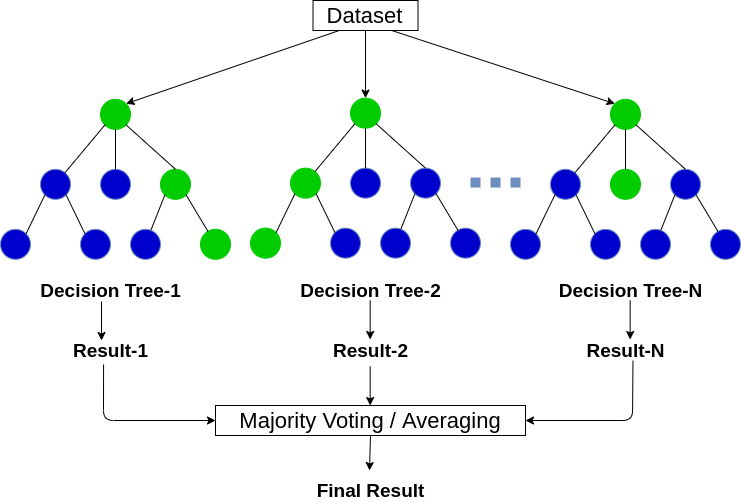

The  combination of learning models will increase the accuracy of the result. The random forest algorithm allows easy  measurement of the relative importance of the features used on the prediction. 

Utilising the Random Forest Model:

### 1.Training 

Fitting the model to our data and applying hyperparamers

In [152]:
# Our forest consists of 100 trees with a max depth of 5
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

### 2.Testing 

To understand the performance of this model, we will get the mean square error and R^2

In [153]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R^2",metrics.r2_score(y_test, y_pred))

RMSE: 0.7322303427596144
R^2 0.8855504525214273


Then we will evaluate it against the expected output

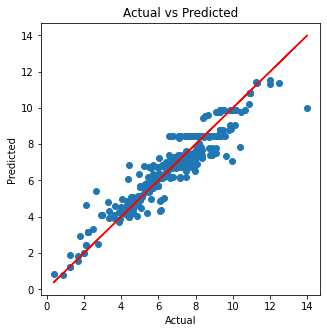

In [154]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

### 3. Adjusting Hyperparameters 

The standard hyperpameter values will not give the best model performance. For that reason, adjustments to the model hyperparameters must take place to get the best performing model.

Creating different hyperparameters of the "n_estimators" to compare the results:

In [155]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

Training the model

In [156]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [157]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [158]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

Evaluating the model

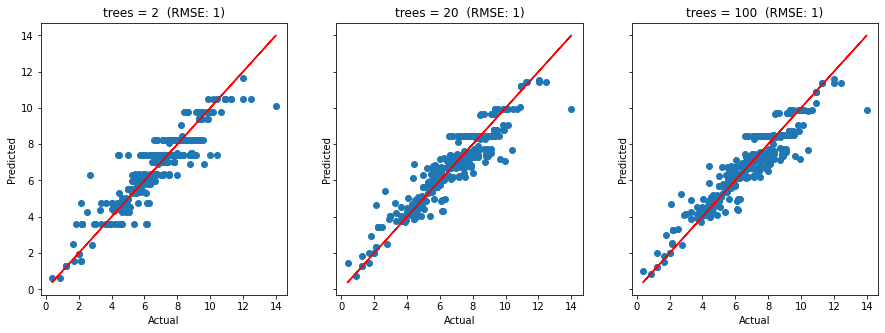

In [159]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(metrics.mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

## 4.2.2: Boosting models

Boosting is an ensemble method in which many predictors are trained sequentially and each succesive predictor learns from the errors of it's predecessor. 
In simple terms 'Many weak learners are combined to form a strong learner.

The following Boosting methods will make use of CARTS( Classification and Regression Trees) similar to the Random forrest.

We will use the following models:
        
        -AdaBoost (Adaptive Boosting):
            After training, each predictor is assigned a coefficient that depends on the training error.
            This coefficient adds more weight to the instances wrongly predicted, so that the next predictor 
            pays more attention to those values.
        
        -GradientBoost(GB):
            Gradient boosting also does sequential correction of predecessor errors. But, unlike AdaBoost, the weight of
            training instances are not tweaked. 
            Instead each predictor is trained using the residual errors of the previous 
            labels. 
            GB's exhastive search procedure means that each cart is trained to find the best split points 
            and features.
            
        
        -Stochastic GradientBoost(SGB):
            This method imporves the generalizability GB method by adding further variance to the ensemble diversity. Each 
            predictor is trained on a random subset of the training data that's been sampled without replacement. 
            Features are sampled without replacement when choosing split points.


### 1. Training

In [160]:
# Decision tree/ Base estimator
dt = DecisionTreeRegressor(max_depth=5, random_state=1)

# Instantiate Ada
ada = AdaBoostRegressor(base_estimator=dt, n_estimators=200, random_state=1)
ada.fit(x_train,y_train)
# Instantiate GB
gb = GradientBoostingRegressor(max_depth=5, 
            n_estimators=200,
            random_state=1)
gb.fit(x_train,y_train)

# Instantiate SGBR
sgb = GradientBoostingRegressor(max_depth=5, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=1)
sgb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, max_features=0.75, n_estimators=200,
                          random_state=1, subsample=0.9)

### 2. Testing

In [161]:
# Dictionary of results
train_ada = ada.predict(x_train)
train_gb = gb.predict(x_train)
train_sgb = sgb.predict(x_train)

test_ada = ada.predict(x_test)
test_gb = gb.predict(x_test)
test_sgb = sgb.predict(x_test)

results_dict = {'Training MSE':{
                        "Ada": metrics.mean_squared_error(y_train, train_ada,squared=False),
                        "GB": metrics.mean_squared_error(y_train, train_gb,squared=False),
                        "SGB": metrics.mean_squared_error(y_train, train_sgb,squared=False),
                },
                'Test MSE':{
                        "Ada": metrics.mean_squared_error(y_test, test_ada,squared=False),
                        "GB": metrics.mean_squared_error(y_test, test_gb,squared=False),
                        "SGB": metrics.mean_squared_error(y_test, test_sgb,squared=False)
                },
                'Train R^2':{
                        "Ada":metrics.r2_score(y_train, train_ada),
                        "GB":metrics.r2_score(y_train, train_gb),
                        "SGB":metrics.r2_score(y_train, train_sgb)
                    
                },
                'Test R^2':{
                        "Ada":metrics.r2_score(y_test, test_ada),
                        "GB":metrics.r2_score(y_test, test_gb),
                        "SGB":metrics.r2_score(y_test, test_sgb)
                }
                }
pd.DataFrame(results_dict)

,Training MSE,Test MSE,Train R^2,Test R^2
Ada,0.567357,0.757402,0.937433,0.877546
GB,0.120621,0.414874,0.997172,0.963259
SGB,0.123121,0.406970,0.997054,0.964646


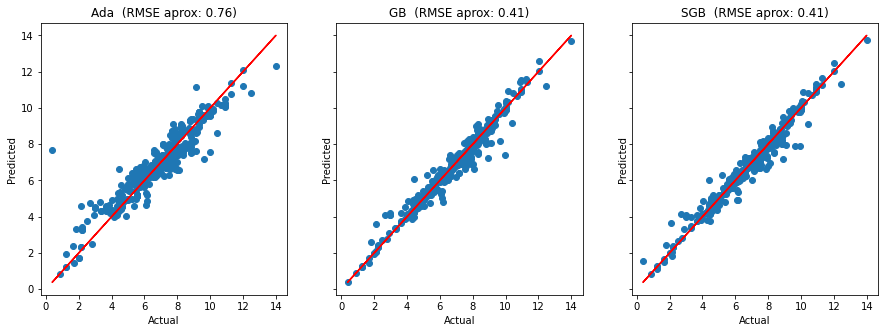

In [162]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [test_ada, test_gb, test_sgb]
title = ['Ada', 'GB', 'SGB']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(metrics.mean_squared_error(y_test,pred[i])),2)
    ax[i].set_title(title[i]+"  (RMSE aprox: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

## 4.3: Simple modelling

In [163]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(x_train_ln, y_train_ln)

LinearRegression()

In [164]:
#Ridge Regression
ridge = Ridge()
ridge.fit(x_train_ln, y_train_ln)

Ridge()

In [165]:
#Lasso Reg
lasso = Lasso(alpha=0.01)
lasso.fit(x_train_ln, y_train_ln)

Lasso(alpha=0.01)

In [166]:
#Support Vector model
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [167]:
#Gradient Boosting model
params = {}
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [168]:
#KNN model
knn= KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [169]:
# Decision Tree
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [170]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [171]:
#Compare models

# Make training set predictions for each model
train_lin = linreg.predict(x_train_ln)
train_ridge = ridge.predict(x_train_ln)
train_lasso = lasso.predict(x_train_ln)
train_Knn = knn.predict(x_train)
train_svr = svr.predict(x_train)
train_gbr = gbr.predict(x_train)
train_DcT = decision_tree.predict(x_train)
train_RnF = random_forest.predict(x_train)

# Make test set predictions for each model
test_lin = linreg.predict(x_test_ln)
test_ridge = ridge.predict(x_test_ln)
test_lasso = lasso.predict(x_test_ln)
test_Knn = knn.predict(x_test)
test_svr = svr.predict(x_test)
test_gbr = gbr.predict(x_test)
test_DcT = decision_tree.predict(x_test)
test_RnF = random_forest.predict(x_test)

# Dictionary of results
results_dict = {'Training MSE':{
                        "Least Squares":metrics.mean_squared_error(y_train_ln, train_lin,squared=False),
                        "Ridge": metrics.mean_squared_error(y_train_ln, train_ridge,squared=False),
                        "LASSO": metrics.mean_squared_error(y_train_ln, train_lasso,squared=False),
                        "SVR": metrics.mean_squared_error(y_train, train_svr,squared=False),
                        "GBR": metrics.mean_squared_error(y_train, train_gbr,squared=False),
                        "KNN": metrics.mean_squared_error(y_train, train_Knn,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_train, train_DcT,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_train, train_RnF,squared=False)
                },
                'Test MSE':{
                        "Least Squares": metrics.mean_squared_error(y_test_ln, test_lin,squared=False),
                        "Ridge": metrics.mean_squared_error(y_test_ln, test_ridge,squared=False),
                        "LASSO": metrics.mean_squared_error(y_test_ln, test_lasso,squared=False),
                        "SVR": metrics.mean_squared_error(y_test, test_svr,squared=False),
                        "GBR": metrics.mean_squared_error(y_test, test_gbr,squared=False),
                        "KNN": metrics.mean_squared_error(y_test, test_Knn,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_test, test_DcT,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_test, test_RnF,squared=False)
                }
                }
results=pd.DataFrame(results_dict)

In [172]:
results

,Training MSE,Test MSE
Least Squares,1.634730e+00,1.405571
Ridge,1.634730e+00,1.405574
LASSO,1.635024e+00,1.406034
SVR,2.052712e+00,1.931900
GBR,4.634587e-01,0.524222
KNN,6.782407e-01,0.891125
Decision Tree,9.347517e-16,0.594390
Random Forest,2.506251e-01,0.472966


In [174]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
#submission = pd.DataFrame(
#    {'Index': test_id,
#     'avg_price_per_kg': Answergb.predict(test_scaled)
#    })

In [175]:
# save DataFrame to csv file for submission
#submission.to_csv("Answergb.csv", index=False)